# Proyecto individual de DA: Gaming

## Objetivo de negocio:
Grupo inversor está dispuesto a invertir en el desarrollo de nuevos productos, para ello, nos solicitar lo siguietne:
* Analizar el mercado de videojuegos.
* Identificar posibles nichos para desarrollar nuevos productos.
* Encontrar los insights y presentarlos.

### Preguntas a considerar y responder

* ¿Qué análisis podemos hacer del mercado actual?
* ¿Qué lineamientos generales deberá tener en cuenta el grupo inversor a la hora de determinar el primer juego de la empresa, para lograr aprovechar al máximo las tendencias del mercado, y así lograr el objetivo planteado?
* ¿Qué diferencias encontramos entre las distintas plataformas?
* ¿Qué relación podemos considerar en cuanto a la población e ingresos per cápita de los países?
* ¿En qué regiones conviene enfocarse?
* ¿Podemos determinar algo con respecto a los rangos etarios u otras características demográficas?
* ¿Podemos estimar las ventas de los juegos actuales o al menos de una categoría? Shooters por ejemplo.

### Dataset a utilizar
| Archivos:
| ------
| Indicadores_del_desarrollo_humano_mundial Banco Mundial Indicadores de desarrollo humano.
| Console_sales Reporte de ventas anuales de consolas. por marca y modelo.
| Juegos en steam. Reporte con estadísticas de uso de juegos en Steam. Incluye recomendaciones  tiempo de uso, etc.
| Video Games Sales Reporte de ventas por Video Juego y Plataforma. Incluye ranking y apertura por mercados (NA, EU, Japón y Global).

## Fases de trabajo
1. Análisis exploratorio de datos para determinar las transformaciones de variables apropiadas, identificar patrones, y conclusiones.
2. Construir KPIs que se integren con el dashboard:
   1.  *Aumentar en un 10% las ventas por sector para el próximo trimestre.*
   2.  *Aumentar en un 10% la plataforma Steam.*
3. Construir un dashboard interactivo, funcional utilizando filtros adecuados.
4. Generar un readme.md que describa el desarrollo del proyecto y sus correspondientes conclusiones.
5. Narrar un storytelling en 10'.

> ## 1. Análisis exploratorio de los datos

#### Procesos a realizar:
1. Búsqueda de valores faltantes
2. Valores atípicos u outliers
3. Análisis univariado y bivariado
4. Registros duplicados
5. Conclusiones

#### 1.1. Importar Librería

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from math import ceil
from scipy.stats import pearsonr

from scipy import stats

%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

#### 1.5. Creación del DataFrame 4_Video_games_sales

In [96]:
df_4 = pd.read_csv('dataset/4_Video_games_sales.csv')

In [97]:
df_4

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,NaN,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
df_4.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [99]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         15848 non-null  float64
 6   EU_Sales         15520 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      15341 non-null  float64
 9   Global_Sales     15728 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [100]:
df_4['Critic_Score']

0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16714     NaN
16715     NaN
16716     NaN
16717     NaN
16718     NaN
Name: Critic_Score, Length: 16719, dtype: float64

Se observa que existen columnas con casi la mitad de filas, por lo cual, no se considerarán.
* Critic_Score
* Critic_Count
* User_Count
* User_Score
* Rating
* Developer

In [101]:
df_4.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [102]:
df_4 = df_4.drop(columns=['Critic_Score', 'Critic_Count', 'User_Count', 'User_Score', 'Rating', 'Developer'])

In [103]:
df_4 = df_4.dropna()

In [104]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12479 entries, 1 to 16717
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             12479 non-null  object 
 1   Platform         12479 non-null  object 
 2   Year_of_Release  12479 non-null  float64
 3   Genre            12479 non-null  object 
 4   Publisher        12479 non-null  object 
 5   NA_Sales         12479 non-null  float64
 6   EU_Sales         12479 non-null  float64
 7   JP_Sales         12479 non-null  float64
 8   Other_Sales      12479 non-null  float64
 9   Global_Sales     12479 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.0+ MB


#### 1.6. Observaciones

* Los tamaños de los DataFrame son pequeños y probablemente no existan problemas al trabarlos en un tablero de control.
* Se han eliminado algunas columnas por datos faltantes. Pero se resolverá en análisis posteriores si se eliminan más por irrelevancia.
* Se observa que el dataframe df_1_1 tiene una estructura rara. Se resolverá más adelante si se normaliza o se deja como está.
* Se ha observado cambiar los nombres de las columnas del df_3 para que queden todos iguales.

#### 2.1. Análisis de nulos

In [105]:
df_4.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
dtype: int64

Observaciones:
* No se observan nulos.

#### 2.2. Estructura y filtrado de datos

In [106]:
# Función para detectar si un valor es un año (número) o no
def is_year(value):
    try:
        # Intenta convertir a entero, si funciona, es un año
        int(value)
        return True
    except (ValueError, TypeError):
        return False

# Crear columnas temporales para identificar valores fuera de lugar
df_4['Year_Correct'] = df_4['Year_of_Release'].apply(lambda x: x if is_year(x) else None)
df_4['Genre_Correct'] = df_4['Genre'].apply(lambda x: x if not is_year(x) else None)

# Identificar valores desplazados
df_4['Year_in_Genre'] = df_4['Genre'].apply(lambda x: x if is_year(x) else None)
df_4['Genre_in_Year'] = df_4['Year_of_Release'].apply(lambda x: x if not is_year(x) else None)

# Rellenar las columnas originales con los valores correctos
df_4['Year_of_Release'] = df_4['Year_Correct'].combine_first(df_4['Year_in_Genre'])
df_4['Genre'] = df_4['Genre_Correct'].combine_first(df_4['Genre_in_Year'])

# Convertir Year_of_Release a tipo entero (si hay NaN, usa Int64 para permitir valores nulos)
df_4['Year_of_Release'] = df_4['Year_of_Release'].astype('Int64')

# Eliminar columnas temporales
df_4 = df_4.drop(columns=['Year_Correct', 'Genre_Correct', 'Year_in_Genre', 'Genre_in_Year'])

df_4

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
...,...,...,...,...,...,...,...,...,...,...
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16713,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01


In [107]:
df_4 = df_4.sort_values(by='Global_Sales', ascending=False)
df_4[df_4['Global_Sales'] > 0.1]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80
...,...,...,...,...,...,...,...,...,...,...
10327,God Eater 2: Rage Burst,PS4,2015,Role-Playing,Namco Bandai Games,0.00,0.01,0.09,0.00,0.11
10328,Pachi-Slot Aruze Oukoku 3,PS,2000,Misc,Aruze Corp,0.00,0.00,0.10,0.01,0.11
10329,Tournament Pool,Wii,2009,Sports,Destineer,0.10,0.00,0.00,0.01,0.11
10330,Rock Band Track Pack: Classic Rock,PS3,2009,Misc,MTV Games,0.10,0.00,0.00,0.01,0.11


In [108]:
# Hacer el conteo de cada año en Year_of_Release
year_counts = df_4['Year_of_Release'].value_counts().sort_index()

print("\nConteo de juegos por año:")
year_counts


Conteo de juegos por año:


Year_of_Release
1980       7
1981      36
1982      27
1983      11
1984      12
1985      11
1986      15
1987      12
1988      13
1989      12
1990      12
1991      32
1992      31
1993      47
1994      96
1995     169
1996     207
1997     232
1998     284
1999     260
2000     266
2001     369
2002     632
2003     578
2004     561
2005     726
2006     781
2007     910
2008    1073
2009    1081
2010     937
2011     883
2012     470
2013     397
2014     433
2015     462
2016     390
2017       3
2020       1
Name: count, dtype: Int64

In [109]:
df_4 = df_4[df_4['Year_of_Release'] < 2017]

df_4 = df_4.sort_values(by='Year_of_Release', ascending=False)

df_4

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15866,Rocksmith 2014 Edition Remastered,PS4,2016,Misc,Ubisoft,0.01,0.00,0.00,0.00,0.02
14606,Darius Burst: Chronicle Saviours,PSV,2016,Action,Kadokawa Games,0.00,0.00,0.03,0.00,0.03
14573,Terraria,WiiU,2016,Action,505 Games,0.00,0.03,0.00,0.00,0.03
9630,NBA 2K17,PS3,2016,Sports,Take-Two Interactive,0.06,0.04,0.00,0.02,0.13
9466,Pro Evolution Soccer 2017,PS3,2016,Sports,Konami Digital Entertainment,0.01,0.05,0.06,0.01,0.13
...,...,...,...,...,...,...,...,...,...,...
1968,Defender,2600,1980,Misc,Atari,0.99,0.05,0.00,0.01,1.05
6301,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
6876,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,0.24
5360,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,0.34


#### 3. Búsqueda de valores atípicos o outliers

Para ello, se procederá a graficar valores en histogramas y boxplots.

In [110]:
df_4.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15866,Rocksmith 2014 Edition Remastered,PS4,2016,Misc,Ubisoft,0.01,0.00,0.00,0.00,0.02
14606,Darius Burst: Chronicle Saviours,PSV,2016,Action,Kadokawa Games,0.00,0.00,0.03,0.00,0.03
14573,Terraria,WiiU,2016,Action,505 Games,0.00,0.03,0.00,0.00,0.03
9630,NBA 2K17,PS3,2016,Sports,Take-Two Interactive,0.06,0.04,0.00,0.02,0.13
9466,Pro Evolution Soccer 2017,PS3,2016,Sports,Konami Digital Entertainment,0.01,0.05,0.06,0.01,0.13


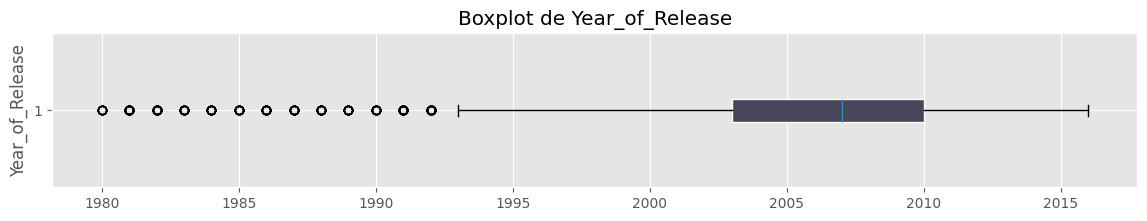

In [111]:
# Crear el boxplot para 'Year_of_Release' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['Year_of_Release'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Year_of_Release')
plt.ylabel('Year_of_Release')
plt.show()

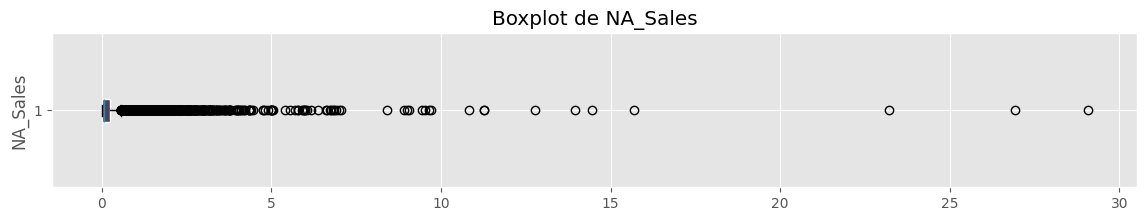

In [112]:
# Crear el boxplot para 'NA_Sales' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['NA_Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de NA_Sales')
plt.ylabel('NA_Sales')
plt.show()

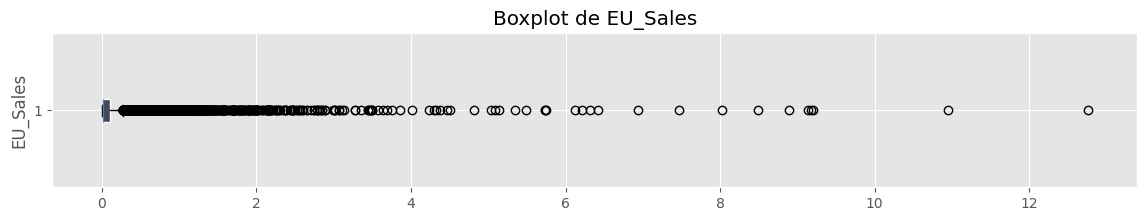

In [113]:
# Crear el boxplot para 'EU_Sales' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['EU_Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de EU_Sales')
plt.ylabel('EU_Sales')
plt.show()

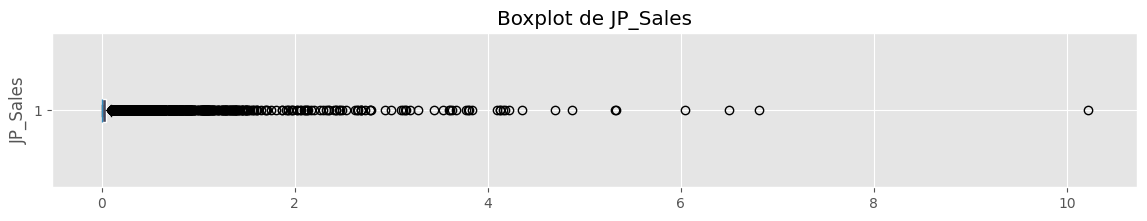

In [114]:
# Crear el boxplot para 'JP_Sales' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['JP_Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de JP_Sales')
plt.ylabel('JP_Sales')
plt.show()

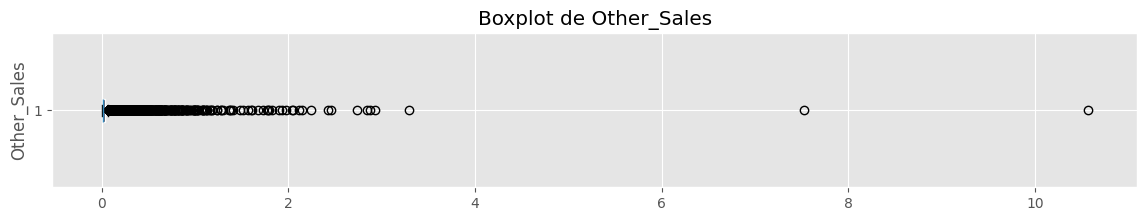

In [115]:
# Crear el boxplot para 'Other_Sales' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['Other_Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Other_Sales')
plt.ylabel('Other_Sales')
plt.show()

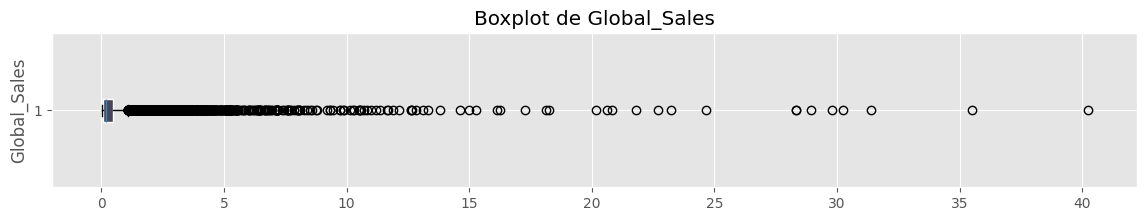

In [116]:
# Crear el boxplot para 'Global_Sales' en horizontal
plt.figure(figsize=(14, 2))
plt.boxplot(df_4['Global_Sales'], vert=False, patch_artist=True, boxprops=dict(facecolor='#474559', color='white'))
plt.title('Boxplot de Global_Sales')
plt.ylabel('Global_Sales')
plt.show()

Observaciones:
* Se observan valores outliers pero dentro de la distribución desgada.
* Year_of_Release tiene distribucación sesgada hacia la izquierda lo que quiere decir que la producción de juegos ha ido en aumento.
* Las restantes columnas de Sales tienen distribución sesgada hacia la derecha, lo que quiere decir que la mediana de ventas es de valor entre 0 y 1, pero hay muchos valores dispersos, y cuanto más te alejas menos valores encuentras. Es decir, es dificil lograr grandes ventas en un juego.

#### 4. Análisis de tendencia

#### 5. Análisis de correlación entre variables

In [117]:
df_4.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

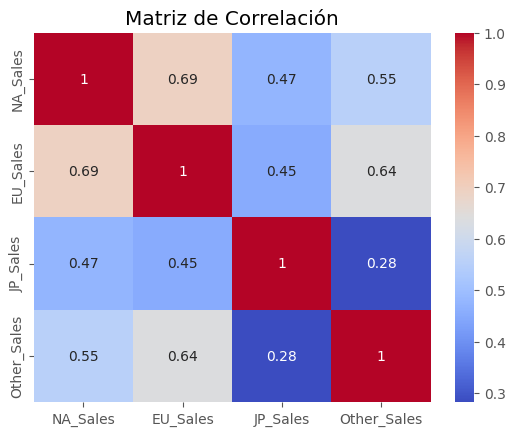

In [118]:
# Calcular la matriz de correlación incluyendo la columna
df_4_corr = df_4[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr()

# Visualizar la matriz de correlación
sns.heatmap(df_4_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Observaciones:
* Se observan correlaciones positivas pero no existe multicolinealidad

#### Análisis de duplicados

In [119]:
# Identificar duplicados

duplicated_rows_4 = df_4.duplicated()

# Mostrar filas duplicadas
print("Filas duplicadas:")

print(df_4[duplicated_rows_4])

# Contar el número de filas duplicadas

num_duplicated_rows_4 = duplicated_rows_4.sum()

print(f"Numero de filas duplicadas: {num_duplicated_rows_4}")

if num_duplicated_rows_4 == 0:
    print('No se encuentran duplicadas en el dataframe df_4')

Filas duplicadas:
Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []
Numero de filas duplicadas: 0
No se encuentran duplicadas en el dataframe df_4


#### Exportación de los DataFrames

In [120]:
df_4.to_csv('dataset_clean/Videogames.csv', index=False)

#### Conclusiones